# Kernel PCA

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import pca

### Kernel PCA solver

**Using rbf kernel**

In [2]:
import numpy as np
import math

class KernelPCA():
    """
    Kernel PCA solver
        this solver uses numpy's lingear algebra tools because they are much faster
        see pca for an implementation of these tools
    """

    def __init__(self):
        self.vectors=None
        self.values=None
        self.means=None
        self.k=None

    def fit(self,data):
        """
        finds the eigenvectors and eigenvalues
        """
        # transform data
        self.landmarks = data.copy()
        X = self.transform(data,1)
        # save means for later
        self.means = X.mean(axis=0)
        # move data to origin
        A = X-self.means
        # get covariance matrix
        cov = np.cov(A)
        self.values, self.vectors = np.linalg.eig(cov)

    def reduce_dimensionality(self,data,k):
        """
        Transform given data, reducing it to k dimensions,
        using eigenvectors previously computed
        """
        # transform data
        X = self.transform(data,1)
        # move data to origin
        A = X-self.means
        W = self.vectors[:k]
        self.k=k
        return np.matmul(W,A.T).T
    
    def transform(self,X,gamma):
        n = len(X)
        matrix = np.zeros((n,len(self.landmarks)))
        for i in range(n):
            for j in range(len(self.landmarks)):
                matrix[i][j] = math.exp(-gamma*((X[i]-self.landmarks[j])**2).sum())
        return matrix

### Data

In [3]:
size = 100
x=np.random.normal(0,1,size)
y=x/5+np.random.normal(0,1,size)
z=x/10+y/5+np.random.normal(0,1,size)
w=x/20+y/10+z/5+np.random.normal(0,1,size)

M = np.concatenate((x,y,z,w)).reshape(4,size).T

### Regular PCA

In [4]:
p = pca.PCA()

In [5]:
p.fit(M)

In [6]:
nokernel = p.reduce_dimensionality(M,2)

### Kernel PCA

In [7]:
kp = KernelPCA()
kp.fit(M)
wkernel = kp.reduce_dimensionality(M,2)

### Reduced dimensions graphs

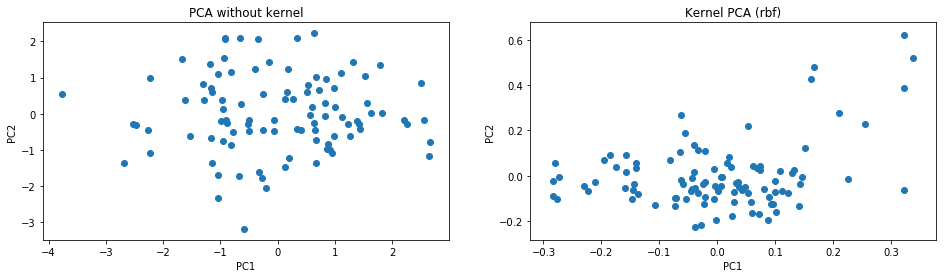

In [8]:
fig, axes = plt.subplots(ncols=2,figsize=(16,4))

axes[0].scatter(nokernel[:,0],nokernel[:,1],)
axes[0].set_title('PCA without kernel')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

axes[1].scatter(wkernel[:,0],wkernel[:,1])
axes[1].set_title('Kernel PCA (rbf)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')


plt.show()

**Note: I currently don't have metrics to check and visualize the performance of this kernel PCA analysis**